# Pembuatan Model STKI

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')  # Untuk download tokenizers

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Import libraries
import glob

# Get CSV files list from a folder
path = '/content/drive/MyDrive/Dokumen/Tugas-Tugas/Kuliah/RISET MBKM-STKI/Preprocessing/Stemming'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dokumen/Tugas-Tugas/Kuliah/RISET MBKM-STKI/Preprocessing/df_final.csv').drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15867 entries, 0 to 15866
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   divisions          14133 non-null  object
 1   title              15867 non-null  object
 2   abstract           12296 non-null  object
 3   subjects           15864 non-null  object
 4   publication        6874 non-null   object
 5   publisher          12214 non-null  object
 6   creators           15851 non-null  object
 7   date               12316 non-null  object
 8   keywords           3418 non-null   object
 9   uri                15867 non-null  object
 10  new_abstract       12296 non-null  object
 11  text_raw           15867 non-null  object
 12  language           15867 non-null  object
 13  language_accuracy  15867 non-null  object
 14  fulltext           15867 non-null  object
 15  fulltext_stopword  15867 non-null  object
 16  text_stemmed       15867 non-null  objec

In [ ]:
# Tampilkan data yang akan di gunakan
df

,divisions,title,abstract,subjects,publication,publisher,creators,date,keywords,uri,new_abstract,text_raw,language,language_accuracy,fulltext,fulltext_stopword,text_stemmed
0,['FP20'],TOKSISITAS METIL METSULFURON HUBUNGANNYA DENGA...,Metil metsulfuron merupakan senyawa aktif yang...,"['Q1', 'SH']",NaN,"Jurusan Perikanan dan Kelautan, Fakultas Perta...","[{'name': {'honourific': None, 'lineage': None...",2024-01-15 00:00:00,NaN,http://repository.lppm.unila.ac.id/id/eprint/4...,Metil metsulfuron merupakan senyawa aktif yang...,TOKSISITAS METIL METSULFURON HUBUNGANNYA DENGA...,id,[id:0.9999985998246005],toksisitas metil metsulfuron hubungannya denga...,toksisitas metil metsulfuron hubungannya masku...,toksisitas metil metsulfuron hubung maskulinit...
1,['FKIP24'],Media Pembelajaran Digital sebagai Sumber Bela...,Kegiatan pembelajaran siswa SMA dan SMK mutlak...,['LA'],EDUKATIF : JURNAL ILMU PENDIDIKAN,Universitas Pahlawan Tuanku Tambusai,"[{'id': 'suparman.arif@fkip.unila.ac.id', 'nam...",2023-02-28,NaN,http://repository.lppm.unila.ac.id/id/eprint/4...,Kegiatan pembelajaran siswa SMA dan SMK mutlak...,Media Pembelajaran Digital sebagai Sumber Bela...,id,[id:0.9999984649495912],media pembelajaran digital sebagai sumber bela...,media pembelajaran digital sumber belajar maha...,media ajar digital sumber ajar mahasiswa didik...
2,['FP1'],Strategi Keberlanjutan Jasa Air Bersih Berbasi...,Persoalan penyediaan jasa air bersih merupakan...,['S1'],NaN,LPPM Universitas Lampung,"[{'name': {'given': 'Zainal', 'lineage': None,...",2023-09-19,NaN,http://repository.lppm.unila.ac.id/id/eprint/5...,Persoalan penyediaan jasa air bersih merupakan...,Strategi Keberlanjutan Jasa Air Bersih Berbasi...,id,[id:0.9999969177170068],strategi keberlanjutan jasa air bersih berbasi...,strategi jasa air bersih berbasis masyarakat k...,strategi jasa air bersih bas masyarakat kawasa...
3,['FP17'],Metode Sexing Spermatozoa XY dan Aplikasi Inse...,NaN,['SF'],NaN,Kusuma Dokumen,"[{'name': {'honourific': None, 'family': 'Adhi...",2023,NaN,http://repository.lppm.unila.ac.id/id/eprint/5...,NaN,Metode Sexing Spermatozoa XY dan Aplikasi Inse...,id,[id:0.999998385833847],metode sexing spermatozoa xy dan aplikasi inse...,metode sexing spermatozoa xy aplikasi insemina...,metode sexing spermatozoa xy aplikasi insemina...
4,['FP25'],PENGARUH BAHAN PELLETING TERHADAP PERKECAMBAHA...,Bawang merah merupakan komoditas pertanian pen...,['S1'],Jurnal Agrotropika,NaN,"[{'id': 'agustiansyah.1972@fp.unila.ac.id', 'n...",2023,"Bawang merah, Benih, Pelleting, TSS",http://repository.lppm.unila.ac.id/id/eprint/5...,Bawang merah merupakan komoditas pertanian pen...,PENGARUH BAHAN PELLETING TERHADAP PERKECAMBAHA...,id,[id:0.9999981965987415],pengaruh bahan pelleting terhadap perkecambaha...,pengaruh bahan pelleting perkecambahan benih b...,pengaruh bahan pelleting kecambah benih bawang...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,['FH3'],Perlindungan Terhadap Korban Perang \r\ndalam ...,Konflik bersenjata hingga kini masih menjadi p...,['K1'],NaN,ICRC,"[{'id': None, 'name': {'honourific': None, 'gi...",NaN,"Korban Perang, Hukum Humaniter Internasional, HAM",http://repository.lppm.unila.ac.id/id/eprint/2...,Konflik bersenjata hingga kini masih menjadi p...,Perlindungan Terhadap Korban Perang \r\ndalam ...,id,[id:0.9999968843606628],perlindungan terhadap korban perang dalam pene...,perlindungan korban perang penegakan hukum hum...,lindung korban perang tega hukum humaniter int...
15863,['FH3'],HAK KEKAYAAN INTELEKTUAL BAGI PEKERJA SENI DI ...,"Dalam perkembangannya, karya cipta hasil kreas...",['K1'],Jurnal Pengabdian kepada Masyarakat Sakai Semb...,Lembaga Penelitian dan Pengabdian kepada Masya...,"[{'name': {'lineage': None, 'given': 'yunita m...",NaN,NaN,http://repository.lppm.unila.ac.id/id/eprint/2...,"Dalam perkembangannya, karya cipta hasil kreas...",HAK KEKAYAAN INTELEKTUAL BAGI PEKERJA SENI DI ...,id,[id:0.9999969864056528],hak kekayaan intelektua

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_stemmed'])

## Visualisasi Data

### Reduksi dimensi dengan PCA

In [ ]:
# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 2 atau 3)
pca = PCA(n_components=2)

# Transformasikan matriks TF-IDF dengan PCA
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

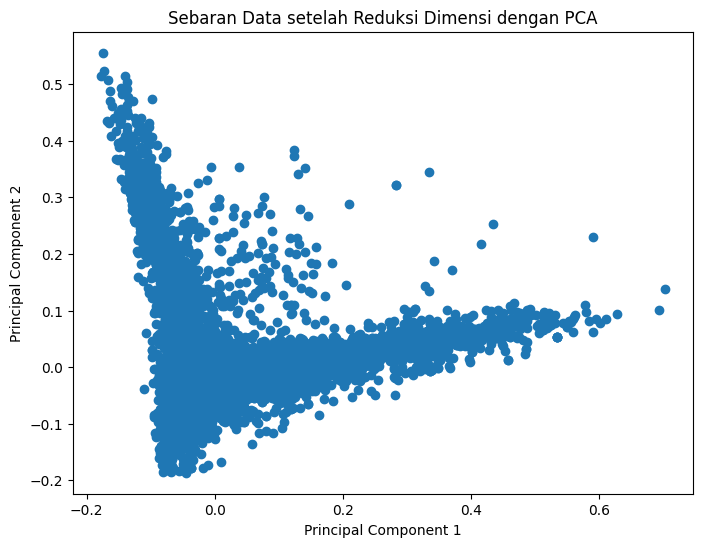

In [ ]:
# Buat scatter plot dari data yang telah direduksi dimensinya
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1])
plt.title('Sebaran Data setelah Reduksi Dimensi dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Reduksi dimensi dengan TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

tfidf_tsne = tsne.fit_transform(tfidf_matrix.toarray())

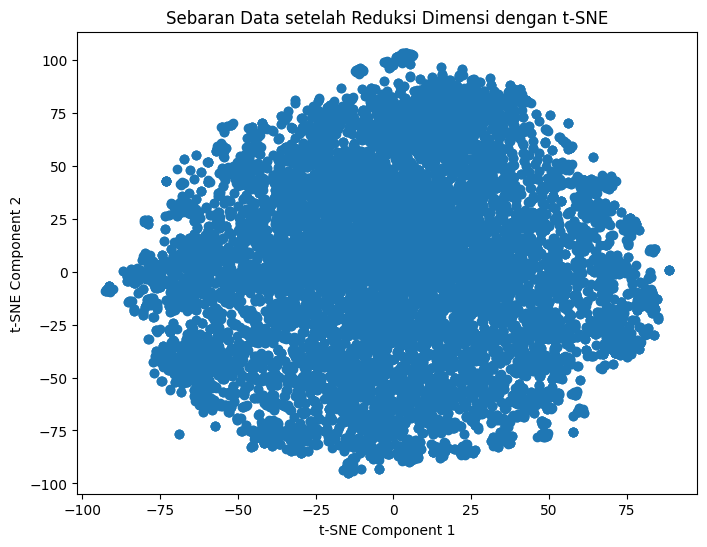

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1])
plt.title('Sebaran Data setelah Reduksi Dimensi dengan t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Klasterisasi

### K-Means

In [ ]:
# Tentukan jumlah klaster yang diinginkan
num_clusters = 35
# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=num_clusters, n_init=10)

# Lakukan klasterisasi dengan vektor TF-IDF
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=35, n_init=10)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score

# Hitung skor Silhouette
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)

print("silhouette_avg:", silhouette_avg)

silhouette_avg: 0.015962171867115044


In [ ]:
# Tambahkan label klaster ke dataframe asli Anda
df['cluster'] = cluster_labels

In [ ]:
klaster = 4

temp = []
for i in range(len(df)):
  if df['cluster'].iloc[i] == klaster:
    temp.append(df.iloc[i])

temp = pd.DataFrame(temp)
temp[['text_raw','text_stemmed','cluster']]

,text_raw,text_stemmed,cluster
101,Klasifikasi Nilai Mahasiswa Universitas Lampun...,klasifikasi nilai mahasiswa universitas lampun...,4
254,Pengaruh Kecerdasan Interpersonal Terhadap Civ...,pengaruh cerdas interpersonal civic dispositio...,4
461,SOSIALISASI KESEHATAN DAN PENTINGNYA EDUKASI P...,sosialisasi sehat edukasi pola hidup bersih se...,4
602,PENGEMBANGAN MODUL EMPLOYABILITY SKILL (KESIAP...,kembang modul employability skill kesiap strat...,4
609,Kemantapan Rencana Pilihan Karier Berdasarkan ...,mantap rencana pilih karier kelompok karakteri...,4
...,...,...,...
15817,FAKTOR FAKTOR YANG BERHUBUNGAN DENGAN PERKEMBA...,faktor faktor hubung kembang identitas profesi...,4
15837,"Publikasi LKTI Mahasiswa ""Bisikan""",publikasi lkti mahasiswa bisik,4
15838,"Publikasi LKTI Mahasiswa ""Edible Water Bubble""",publikasi lkti mahasiswa edible water bubble,4
15839,"Publikasi LKTI Mahasiswa ""Foruner""",publikasi lkti mahasiswa foruner,4
